In [480]:
import pandas as pd
import matplotlib.pyplot as plt

In [481]:
# import survey data file
df = pd.read_csv('data/library_survey_data.csv')

# change column names
"""
Details on the types of seats:
discussion_cubicles -> discussion cubicles at lvl 3
windowed -> windowed seats at lvl 5 and 6
diagonal -> diagonal seats at lvl 6
cubicle -> cubicle seats at lvl 6
4-man -> 4-man tables at lvl 5
8-man -> 8-man tables at lvl 5
soft -> soft seats at lvl 3 and 4
sofa -> sofa at lvl 3 and 4
moveable -> moveable seats at lvl 3
"""
df.columns = ['Datatime', 'visit_time', 'entry_lvl', 'visit_reason', 'year_of_study', 'usual_amt_time', 'exam_amt_time', 'lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding', 'acceptance_alternate_seat', 'crowded_lvl', 'lunch_time', 'group_size', 'acceptance_share_table', 'printer_only_frequency', 'hogging_duration', 'hogging_reason']



In [482]:
# fill NA with 3 (neutral) for those that leave blank for rating
columns_to_fillna = ['lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding']
df[columns_to_fillna] = df[columns_to_fillna].fillna(value='3')


# fill NA with neutral for those that leave blank for acceptance_share_table 
df['acceptance_share_table'] = df['acceptance_share_table'].fillna(value='neutral')

# convert all to lower case 
df = df.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'O' else x)
 
# remove results where people do not visit library (visit_time does not contain am or pm)
df = df[df['visit_time'].str.contains('AM|PM', case=False, na=False, regex=True)]

# make all numeric for ratings
df[columns_to_fillna] = df[columns_to_fillna].replace('1 - least preferred', '1')
df[columns_to_fillna] = df[columns_to_fillna].replace('5 - most preferred', '5')
for col in columns_to_fillna:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df






,Datatime,visit_time,entry_lvl,visit_reason,year_of_study,usual_amt_time,exam_amt_time,lvl3_rate,lvl4_rate,lvl5_rate,...,moveable_lighting,moveable_seat_finding,acceptance_alternate_seat,crowded_lvl,lunch_time,group_size,acceptance_share_table,printer_only_frequency,hogging_duration,hogging_reason
0,18/10/2023 17:22:19,"11am, 2pm","level 1, level 4",study (long period),year 3,4 hrs,6 hrs,2,3,3,...,3.0,3.0,yes,level 6,12-1pm,2-3 pax,neutral,never,leave my belongings and go for lessons. (1hr-2hr),chopping seats cause will study for a very lon...
1,18/10/2023 18:20:35,1pm,level 4,study (short period i.e. kill time between cla...,year 3,4 hrs,less than 2hrs,2,3,3,...,3.0,3.0,yes,level 4,12-1pm,1 pax,no,never,leave my belongings and go for lunch. (30min-1hr),friends chopping seats for friends who cmg late
2,23/10/2023 11:13:44,10am,level 4,study (short period i.e. kill time between cla...,year 3,up to 1 hour,up to 1 hour,2,3,1,...,3.0,2.0,yes,level 4,11-12pm,alone,maybe,never,i take my belongings everytime i leave,chopping seats cause will study for a very lon...
3,23/10/2023 11:25:02,"2pm, 3pm, 6pm","level 1, level 4",study (short period i.e. kill time between cla...,year 3,up to 2 hours,up to 4 hours,3,2,5,...,3.0,4.0,yes,l6 – central library,12-1pm,alone,share a table with a stranger,never,leave my belongings and go for lunch. (30min-1hr),"no, first come first serve and can only leave ..."
4,23/10/2023 11:56:49,11am,level 4,study (long period),year 2,up to 6 hours,up to 1 hour,4,4,4,...,4.0,4.0,yes,level 5,11-12pm,2-3 pax,neutral,never,leave my belongings and go for lunch. (30min-1hr),chopping seats for friends who are coming late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26/10/2023 21:24:58,11am,level 1,study (short period i.e. kill time between cla...,general public,up to 4 hours,up to 4 hours,3,3,3,...,1.0,1.0,yes,level 3,12-1pm,2-3 pax,neutral,never,i take my belongings everytime i leave,"no, first come first serve and can only leave ..."
243,26/10/2023 21:53:31,"10am, 11am, 12pm, 1pm, 2pm, 3pm, 4pm, 5pm","level 1, level 4",study (long period),year 3,up to 4 hours,up to 6 hours,3,4,2,...,5.0,3.0,yes,l6 – central library,11-12pm,2-3 pax,look for a seat outside the library,never,leave my belongings and go for lunch. (30min-1hr),chopping seats because they will study for a v...
244,26/10/2023 22:16:36,10am,level 4,napping,year 4/final year,up to 6 hours,up to 6 hours,1,2,3,...,2.0,4.0,yes,level 5,12-1pm,2-3 pax,neutral,once a month,i usually chope a seat for the whole day.,chopping seats for friends who are coming late
245,26/10/2023 22:59:09,"3pm, 4pm, 5pm",level 1,study (short period i.e. kill time between cla...,graduate,up to 2 hours,up to 4 hours,3,3,5,...,3.0,1.0,yes,l6 – chinese library,1-2pm,alone,share a table with a stranger,never,leave my belongings and go for lunch. (30min-1hr),chopping seats because they will study for a v...


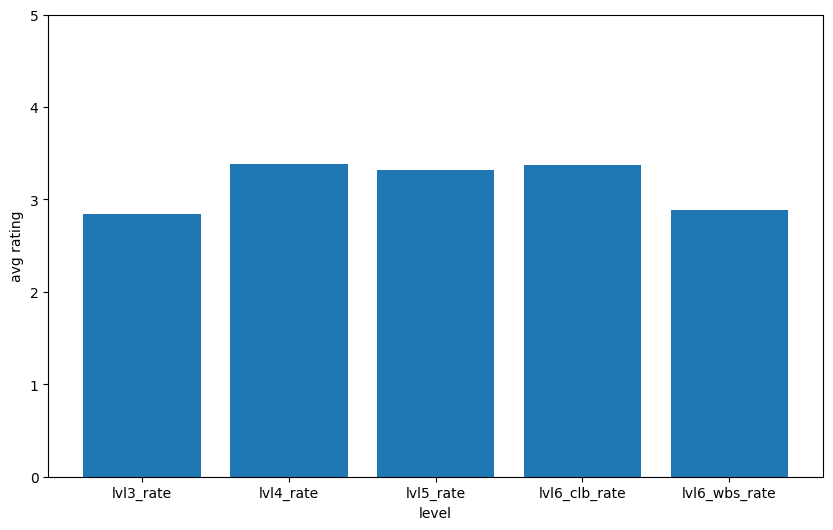

In [483]:
# visualise avg ratings for each level
rating_columns = ['lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate']
lvl_avg = df[rating_columns].mean()

plt.figure(figsize=(10, 6))
plt.bar(rating_columns,lvl_avg)
plt.xlabel('level')
plt.ylabel('avg rating')
plt.ylim(0, 5)
plt.show()

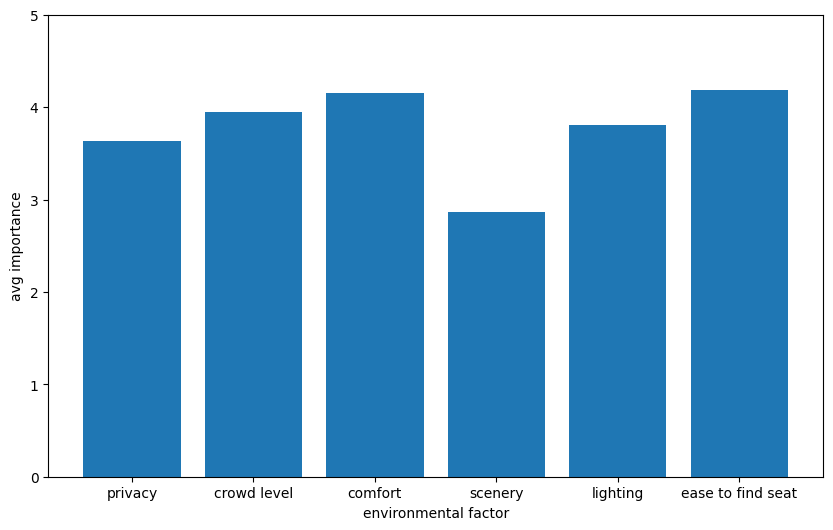

In [484]:
# visualise importance of each environmental component

env_rating = ['privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate']
env_avg = df[env_rating].mean()

env_factors = ['privacy', 'crowd level', 'comfort', 'scenery', 'lighting', 'ease to find seat']

plt.figure(figsize=(10, 6))
plt.bar(env_factors,env_avg)
plt.xlabel('environmental factor')
plt.ylabel('avg importance')
plt.ylim(0,5)
plt.show()


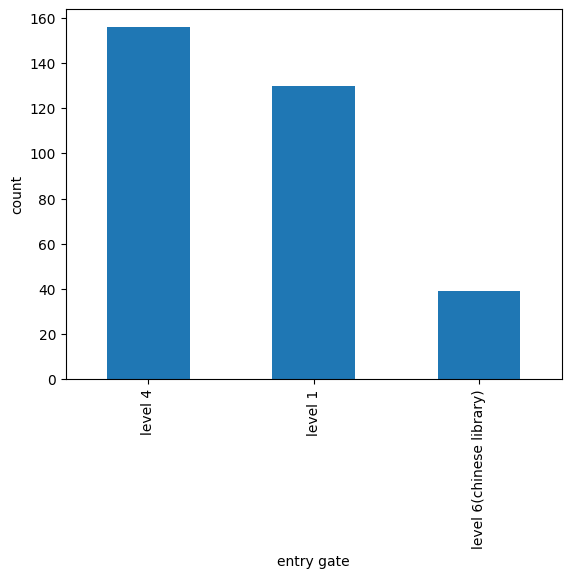

In [485]:
# visualise distribution of starting gate from survey

gate_counts = df['entry_lvl'].str.split(', ').explode().value_counts()

gate_counts.plot(kind='bar')
plt.xlabel('entry gate')
plt.ylabel('count')
plt.show()


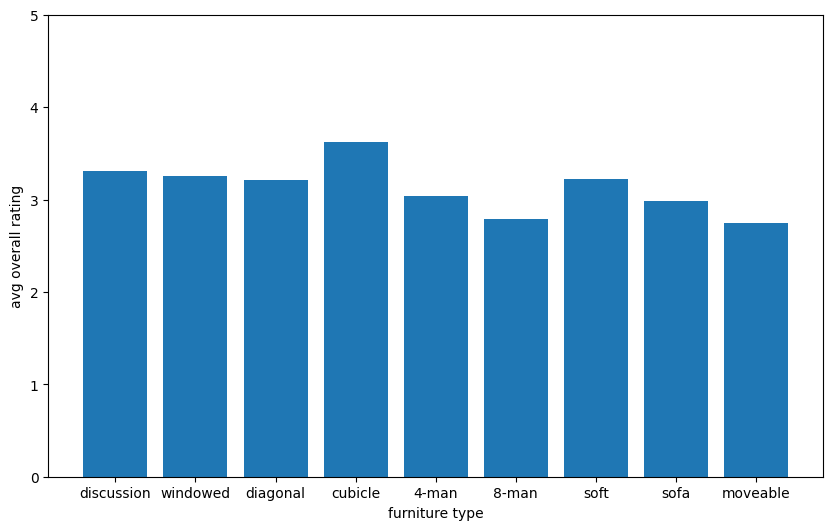

In [486]:
# visualise overall rate of each furniture

overall_rate = ['discussion_cubicles_rate', 'windowed_rate', 'diagonal_rate', 'cubicle_rate', '4-man_rate', '8-man_rate', 'soft_rate', 'sofa_rate', 'moveable_rate']
furniture_avg = df[overall_rate].mean()

furnitures = ['discussion', 'windowed', 'diagonal', 'cubicle', '4-man', '8-man', 'soft', 'sofa', 'moveable']

plt.figure(figsize=(10, 6))
plt.bar(furnitures,furniture_avg)
plt.xlabel('furniture type')
plt.ylabel('avg overall rating')
plt.ylim(0,5)
plt.show()




In [487]:
# visualise rate of each environmental factor for each furniture
# 1. same environmental factor across all furnitures
# 2. different environmental factor for each furniture

privacy_rate_cols = df.filter(like='_privacy')
crowd_lvl_rate_cols = df.filter(like='_crowd')
comfort_rate_cols = df.filter(like='_comfort')
scenery_rate_cols = df.filter(like='_scenery')
lighting_rate_cols = df.filter(like='_lighting')
seat_finding_rate_cols = df.filter(like='_seat_finding')

discussion_cubicle = df.filter(like='discussion_cubicles_')
windowed = df.filter(like='windowed_')
diagonal = df.filter(like='diagonal_')
cubicle = df.filter(like='cubicle_')
four_man = df.filter(like='4-man_')
eight_man = df.filter(like='8-man_')
soft = df.filter(like='soft_')
sofa = df.filter(like='sofa_')
moveable = df.filter(like='moveable_')

new_xlabel = ['overall rating'] + env_factors
 

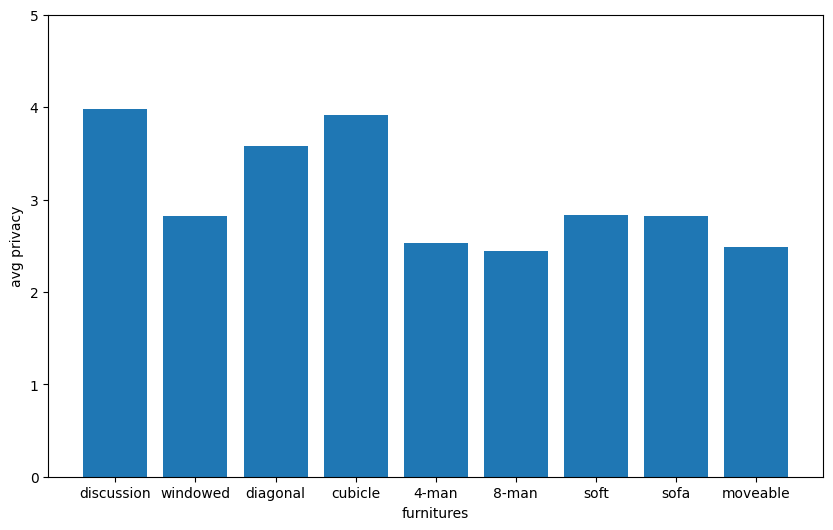

In [488]:
## avg privacy rate for all furnitures
privacy_avg = privacy_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,privacy_avg)
plt.xlabel('furnitures')
plt.ylabel('avg privacy')
plt.ylim(0,5)
plt.show()

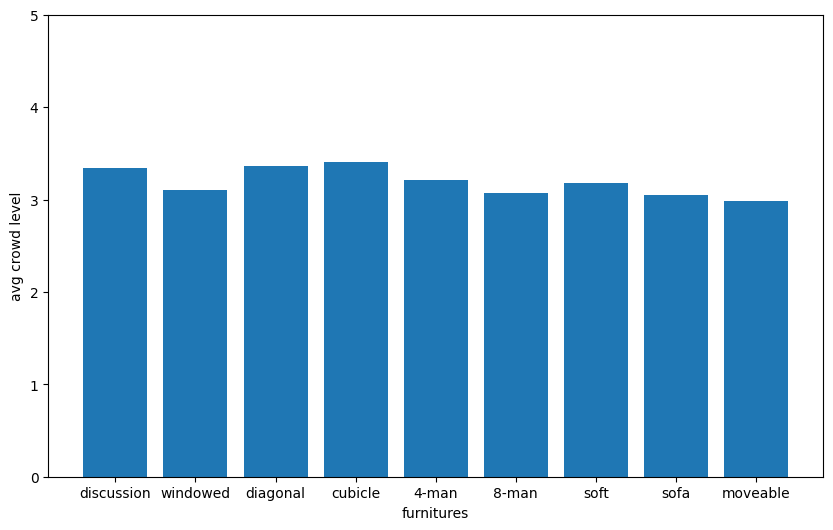

In [489]:
## avg crowd lvl rate across diff furnitures
crowd_avg = crowd_lvl_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,crowd_avg)
plt.xlabel('furnitures')
plt.ylabel('avg crowd level')
plt.ylim(0,5)
plt.show()


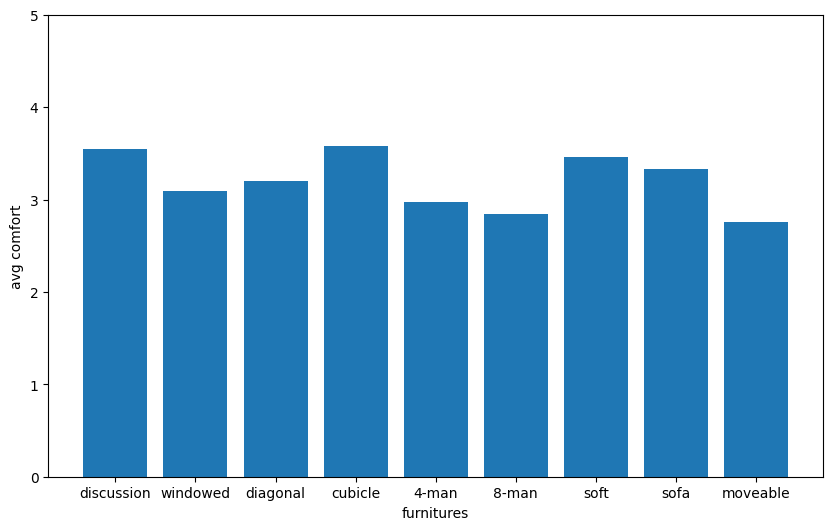

In [490]:
## avg comfort rate across diff furnitures
comfort_avg = comfort_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,comfort_avg)
plt.xlabel('furnitures')
plt.ylabel('avg comfort')
plt.ylim(0,5)
plt.show()

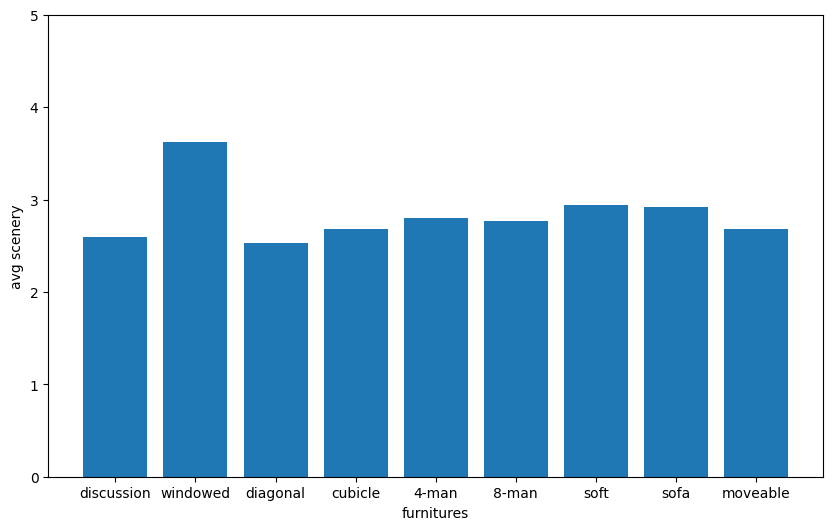

In [491]:
## avg scenery rate across diff furnitures
scenery_avg = scenery_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,scenery_avg)
plt.xlabel('furnitures')
plt.ylabel('avg scenery')
plt.ylim(0,5)
plt.show()

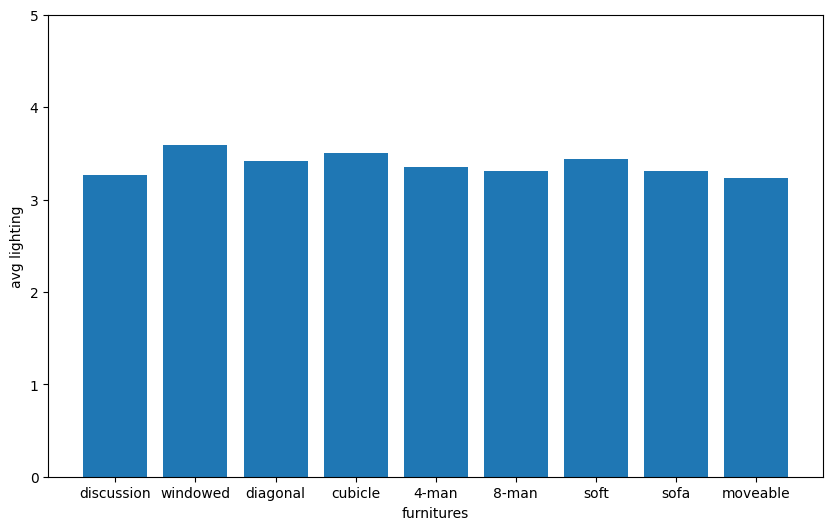

In [492]:
## avg lighting rate across diff furnitures
lighting_avg = lighting_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,lighting_avg)
plt.xlabel('furnitures')
plt.ylabel('avg lighting')
plt.ylim(0,5)
plt.show()

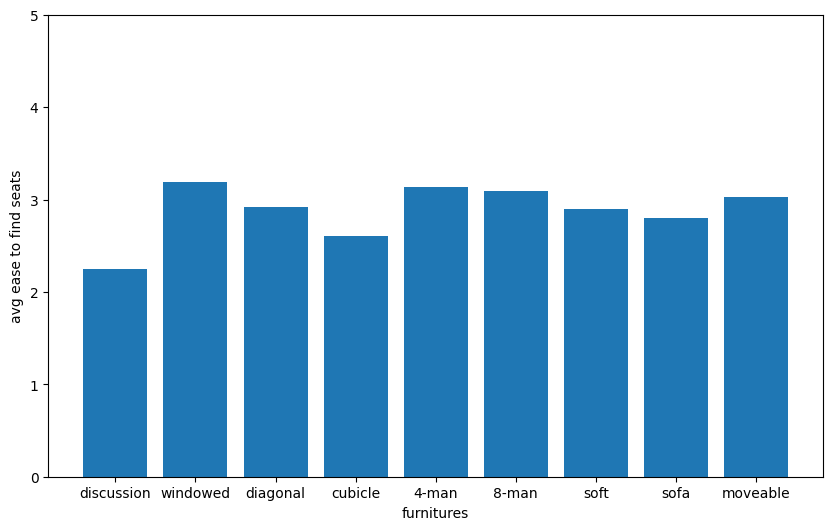

In [493]:
## avg ease to find seat rate across diff furnitures
seats_avg = seat_finding_rate_cols.mean()

plt.figure(figsize=(10, 6))
plt.bar(furnitures,seats_avg)
plt.xlabel('furnitures')
plt.ylabel('avg ease to find seats')
plt.ylim(0,5)
plt.show()

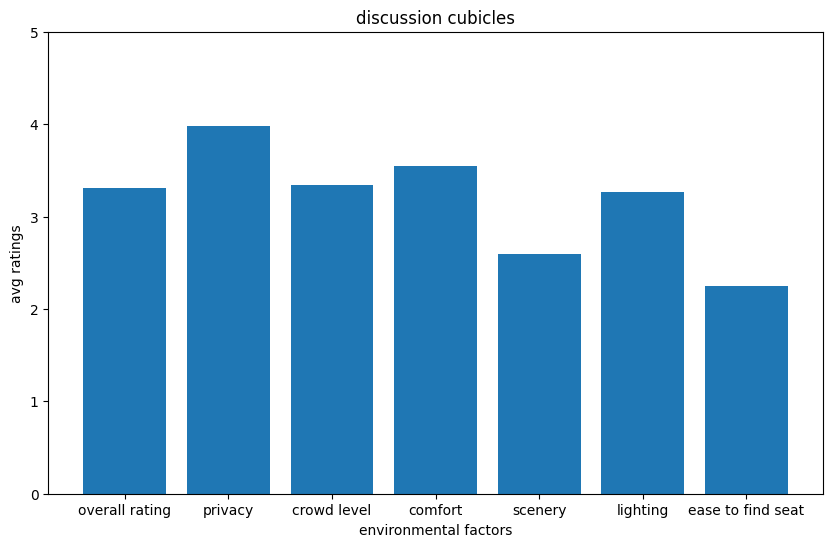

In [494]:
## avg rate of each factor for discussion cubicles
discussion_avg = discussion_cubicle.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,discussion_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('discussion cubicles')
plt.ylim(0,5)
plt.show()

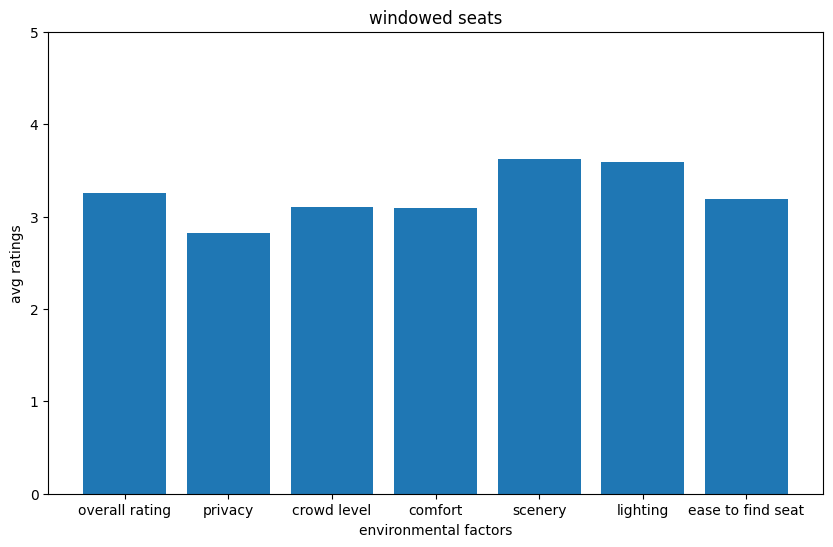

In [495]:
## avg rate of each factor for windowed seats
windowed_avg = windowed.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,windowed_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('windowed seats')
plt.ylim(0,5)
plt.show()

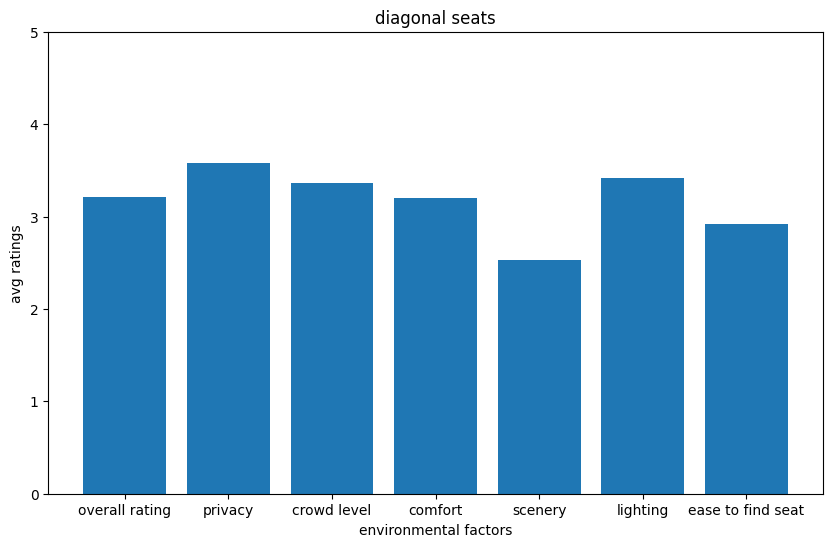

In [496]:
## avg rate of each factor for diagonal seats
diagonal_avg = diagonal.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,diagonal_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('diagonal seats')
plt.ylim(0,5)
plt.show()

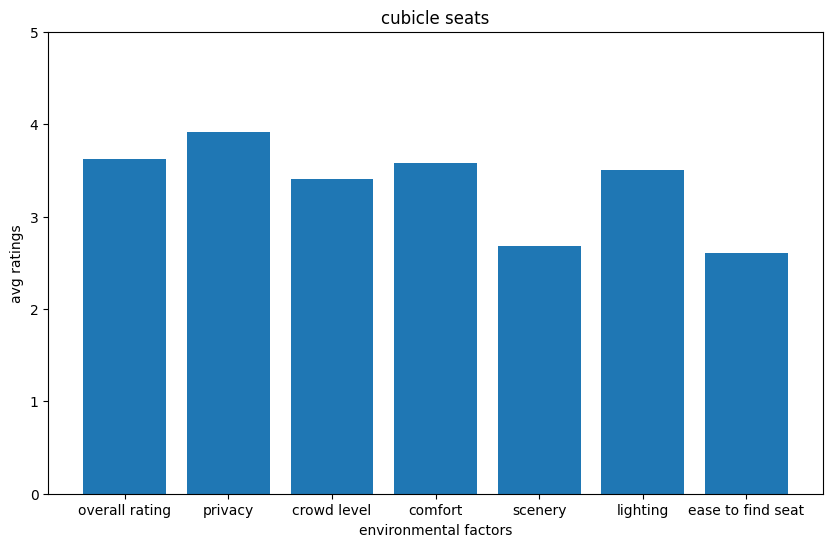

In [497]:
## avg rate of each factor for cubicle seats
cubicle_avg = cubicle.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,cubicle_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('cubicle seats')
plt.ylim(0,5)
plt.show()

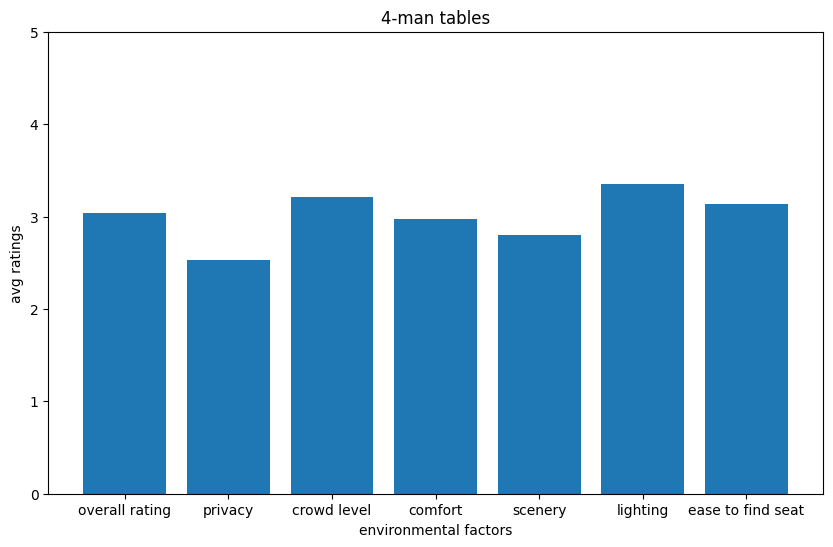

In [498]:
## avg rate of each factor for 4-man tables
four_man_avg = four_man.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,four_man_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('4-man tables')
plt.ylim(0,5)
plt.show()

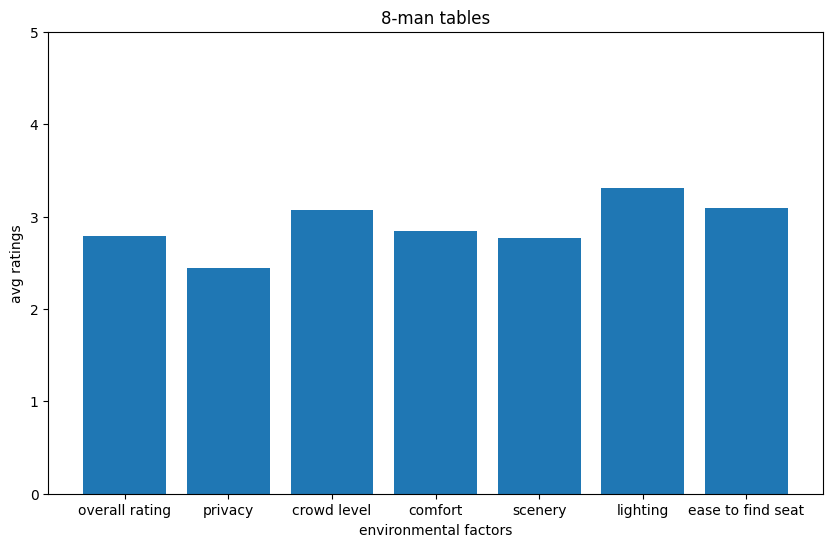

In [499]:
## avg rate of each factor for 8-man tables
eight_man_avg = eight_man.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,eight_man_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('8-man tables')
plt.ylim(0,5)
plt.show()

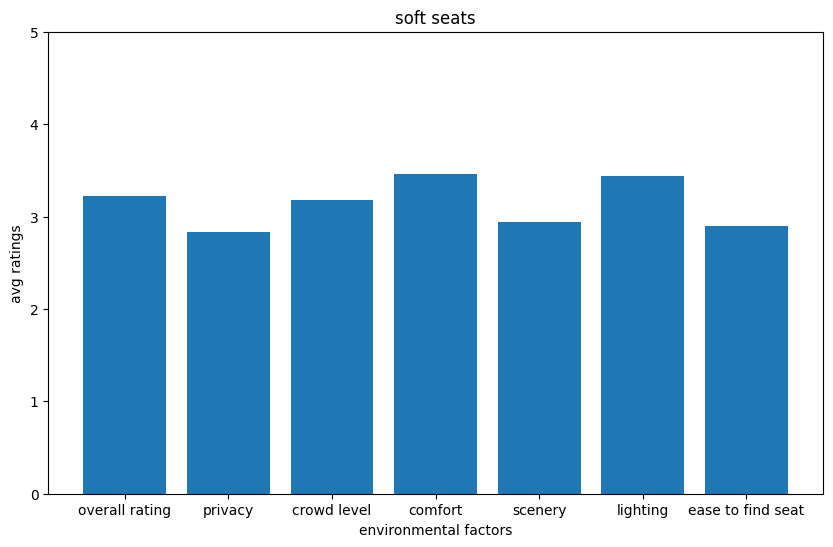

In [500]:
## avg rate of each factor for soft seats
soft_avg = soft.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,soft_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('soft seats')
plt.ylim(0,5)
plt.show()

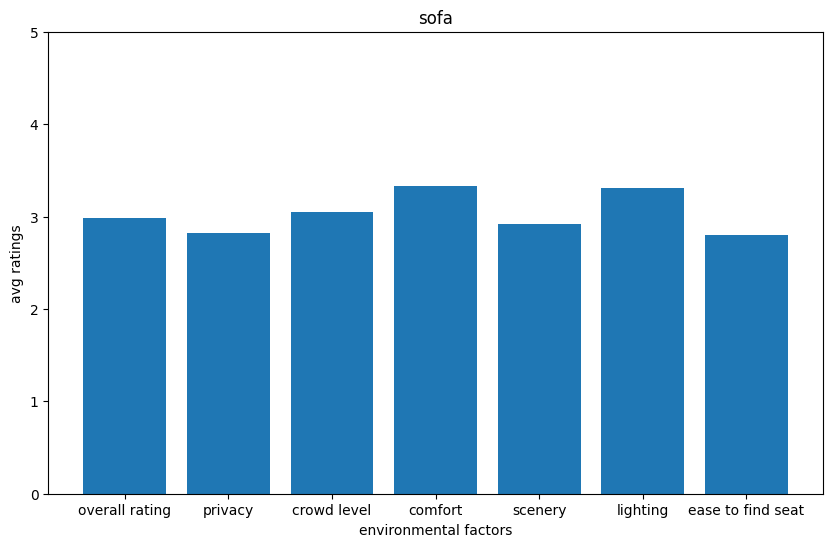

In [501]:
## avg rate of each factor for sofa
sofa_avg = sofa.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,sofa_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('sofa')
plt.ylim(0,5)
plt.show()

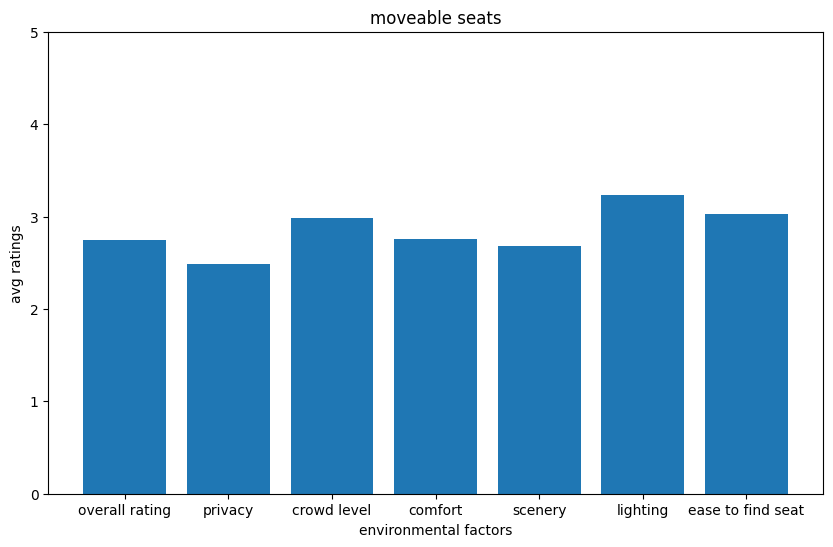

In [502]:
## avg rate of each factor for moveable seats
moveable_avg = moveable.mean()

plt.figure(figsize=(10, 6))
plt.bar(new_xlabel,moveable_avg)
plt.xlabel('environmental factors')
plt.ylabel('avg ratings')
plt.title('moveable seats')
plt.ylim(0,5)
plt.show()

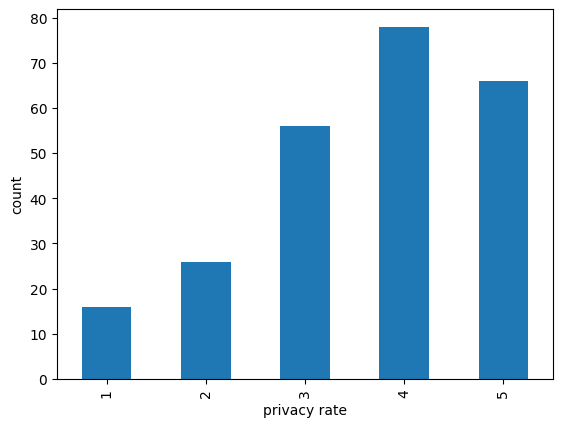

In [507]:
# visualise distribution of each feature
## i.e. the number of people giving certain rate for certain environmental factor
privacy_counts = df['privacy_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('privacy rate')
plt.ylabel('count')
plt.show()

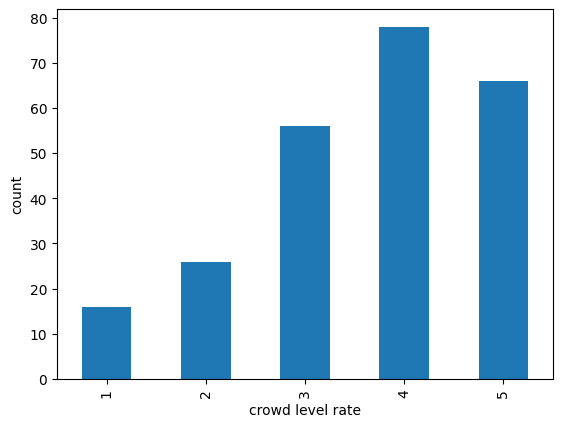

In [508]:
crowd_counts = df['crowd_lvl_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('crowd level rate')
plt.ylabel('count')
plt.show()

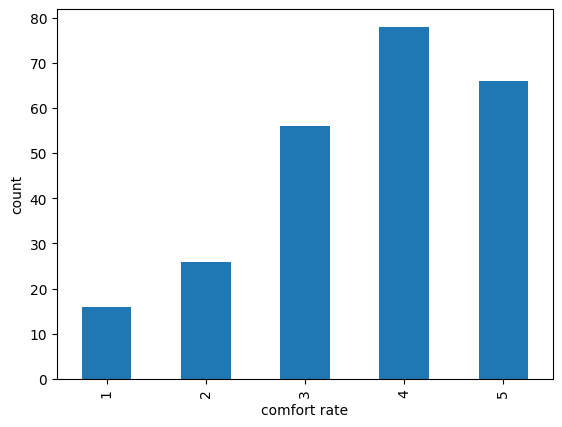

In [509]:
comfort_counts = df['comfort_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('comfort rate')
plt.ylabel('count')
plt.show()

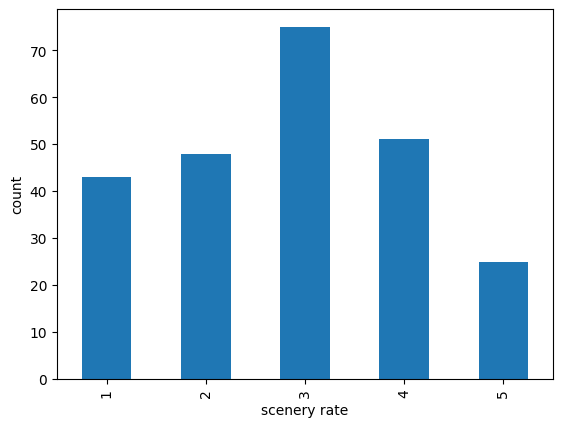

In [510]:
scenery_counts = df['scenery_rate'].explode().value_counts().sort_index()

scenery_counts.plot(kind='bar')
plt.xlabel('scenery rate')
plt.ylabel('count')
plt.show()

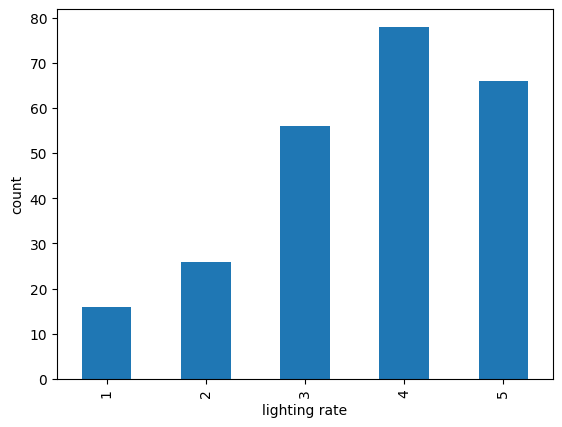

In [511]:
lighting_counts = df['lighting_rate'].explode().value_counts().sort_index()

privacy_counts.plot(kind='bar')
plt.xlabel('lighting rate')
plt.ylabel('count')
plt.show()

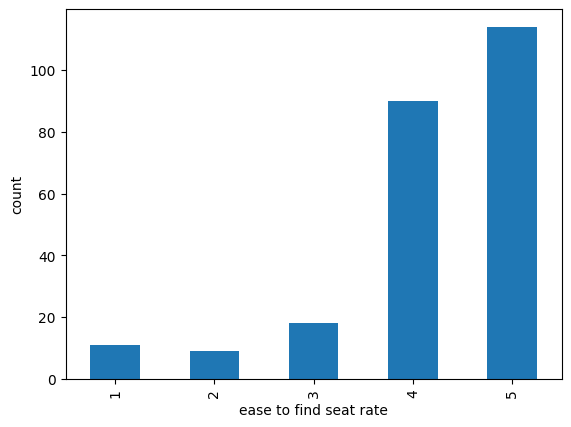

In [512]:
ease_counts = df['ease_find_seat_rate'].explode().value_counts().sort_index()

ease_counts.plot(kind='bar')
plt.xlabel('ease to find seat rate')
plt.ylabel('count')
plt.show()

In [ ]:
## visualise 